In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\UJJWAL GARG\Desktop\by\ana\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()
X_train=X_train/255
X_test=X_test/255

In [3]:
X_train[0].shape

(28, 28)

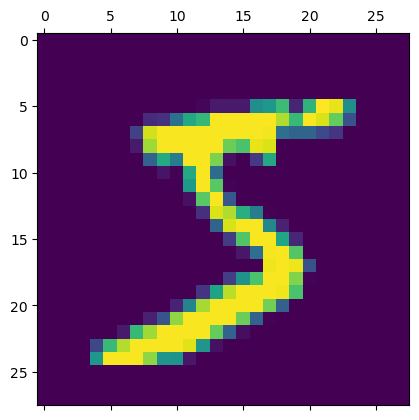

In [4]:
plt.matshow(X_train[0])

In [5]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),28*28)

In [6]:
X_test_flat.shape

(10000, 784)

In [7]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(X_train_flat,Y_train,epochs=5)



Epoch 1/5


1875/1875 [==============================] - 6s 2ms/step - loss: 0.4644 - accuracy: 0.8808
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3031 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2726 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9254


In [8]:
model.evaluate(X_test_flat,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.9260


[0.26845037937164307, 0.9259999990463257]

In [9]:
Y_pred=model.predict(X_test_flat)
Y_pred[7]

313/313 [==============================] - 1s 2ms/step


array([1.6320545e-06, 2.4676497e-01, 1.0770480e-02, 2.1275360e-02,
       2.5287798e-01, 3.1248230e-01, 1.1944319e-03, 1.2488006e-02,
       1.2452724e-01, 9.5575595e-01], dtype=float32)

In [10]:
Y_p_l=[np.argmax(i)for i in Y_pred]
Y_p_l[:5]

[7, 2, 1, 0, 4]

In [11]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [12]:
confusion_matrix=tf.math.confusion_matrix(labels=Y_test,predictions=(Y_p_l))
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    7,    6,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  913,   21,    7,    5,   13,   11,   44,    3],
       [   2,    0,   13,  926,    1,   24,    2,   10,   27,    5],
       [   1,    1,    4,    1,  926,    0,   11,    4,   11,   23],
       [   7,    2,    3,   32,    7,  795,   12,    4,   26,    4],
       [  10,    3,    5,    1,    7,   21,  905,    2,    4,    0],
       [   1,    6,   21,    7,    7,    1,    0,  954,    5,   26],
       [   6,    8,    5,   19,    9,   29,    8,   11,  874,    5],
       [  11,    7,    1,   10,   35,   11,    0,   30,    9,  895]])>

Text(95.72222222222221, 0.5, 'actual')

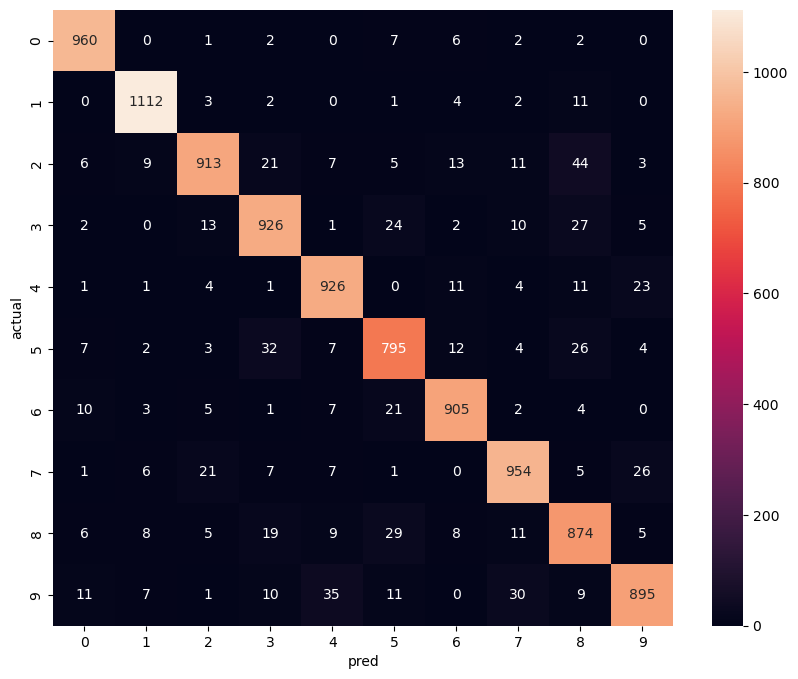

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.xlabel("pred")
plt.ylabel("actual")

In [14]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation="relu"),
                      keras.layers.Dense(10,activation="sigmoid")])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(X_train_flat,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2741 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1215 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0843 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0627 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9843


In [15]:
model.evaluate(X_test_flat,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9765


[0.07482755929231644, 0.9764999747276306]